<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/deep_learning/deep_learning/red_recurrente/RNR_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal recurrente

## Instalación de keras

In [30]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


## Importar conjunto de datos

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_train = pd.read_csv("https://raw.githubusercontent.com/cccg8105/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Train.csv")
training_set  = dataset_train.iloc[:, 1:2].values # obtiene solo la columna "Open" como dataframe y obtiene los valores

dataset_test = pd.read_csv('https://raw.githubusercontent.com/cccg8105/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_train.head(5)
dataset_test.head(5)


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


## Preprocesado de datos

### Escalado de variables

In [32]:
from sklearn.preprocessing import MinMaxScaler

# se escala entre valores de 0 y 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

print(training_set)
print(training_set_scaled)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Modificar estructura de datos

Se utilizan los datos de 60 dias pasados para predecir un día futuro. De acuerdo a esto se separan en arreglos diferentes los datos de entrenamiento y prueba

In [33]:
X_train = []
y_train = []

periodosPasados = 60
periodosTotales = len(training_set)

for i in range(periodosPasados, periodosTotales):
    X_train.append(training_set_scaled[i-periodosPasados:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Se agrega nueva dimension a la matriz en caso de colocar mas variables al modelo
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train)
print(X_train.shape[1])

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
60


## Construcción LSTM apilado

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

# Primera capa de LSTM y la regulariación por Dropout
nodos = 50
secuenciaRetorno = True # Devuelve la neuronas LSTM, para reutilizarlas en las siguientes capas
tamanioPeriodoPrueba = X_train.shape[1]
cantidadCaracteristicas = 1

regressor.add(LSTM(units = nodos, return_sequences = secuenciaRetorno, input_shape = (tamanioPeriodoPrueba, cantidadCaracteristicas) ))
ratioDesactivacionNodos = 0.2
regressor.add(Dropout(ratioDesactivacionNodos))

# Segunda capa de LSTM y la regulariación por Dropout
regressor.add(LSTM(units = nodos, return_sequences = secuenciaRetorno ))
ratioDesactivacionNodos2 = 0.2
regressor.add(Dropout(ratioDesactivacionNodos2))

# Tercera capa de LSTM y la regulariación por Dropout
ratioDesactivacionNodos3 = 0.2
regressor.add(LSTM(units = nodos, return_sequences = secuenciaRetorno ))
regressor.add(Dropout(ratioDesactivacionNodos3))

# Cuarta capa de LSTM y la regulariación por Dropout
ratioDesactivacionNodos4 = 0.2
regressor.add(LSTM(units = nodos))
regressor.add(Dropout(ratioDesactivacionNodos4))

# Capa de salida
regressor.add(Dense(units = 1))

## Compilación

In [35]:
optimizador = 'adam'
funcionPerdida = 'mean_squared_error'
metricas = ["accuracy"]
regressor.compile(optimizer = optimizador, loss = funcionPerdida, metrics = metricas)

## Entrenamiento

In [25]:
epocas = 100
tamanioLote = 32
regressor.fit(X_train, y_train, epochs = epocas, batch_size = tamanioLote)

Epoch 1/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 2/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0013 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0015 - accura

## Evaluar modelo con datos de prueba

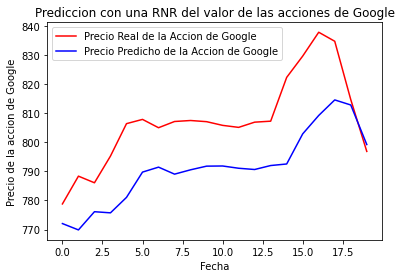

In [26]:
nombreColumna = 'Open'
# concatena dataset de entrenamiento y prueba
dataset_total = pd.concat((dataset_train[nombreColumna], dataset_test[nombreColumna]), axis = 0)
indiceInicialEntrenamiento = len(dataset_total) - len(dataset_test) - periodosPasados

# se utilizan los ultimos registros del año anterior para predecir el primer mes futuro  
inputs = dataset_total[indiceInicialEntrenamiento:].values
inputs = inputs.reshape(-1,1) # se agrega una columna adicional
inputs = sc.transform(inputs) # se escalan los valores
X_test = []

cantidadRegistrosPrueba = len(dataset_test)

for i in range(periodosPasados, cantidadRegistrosPrueba):
    X_test.append(inputs[i-periodosPasados:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# prediccion con el modelo generado
predicted_stock_price = regressor.predict(X_test)

# se regresan al valor original los datos transformados en las predicciones
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizar los Resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio Real de la Accion de Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio Predicho de la Accion de Google')
plt.title("Prediccion con una RNR del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google")
plt.legend()
plt.show()